In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
data_dir = 'train'

In [26]:
# cat = 0   , dogs = 1
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 557 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

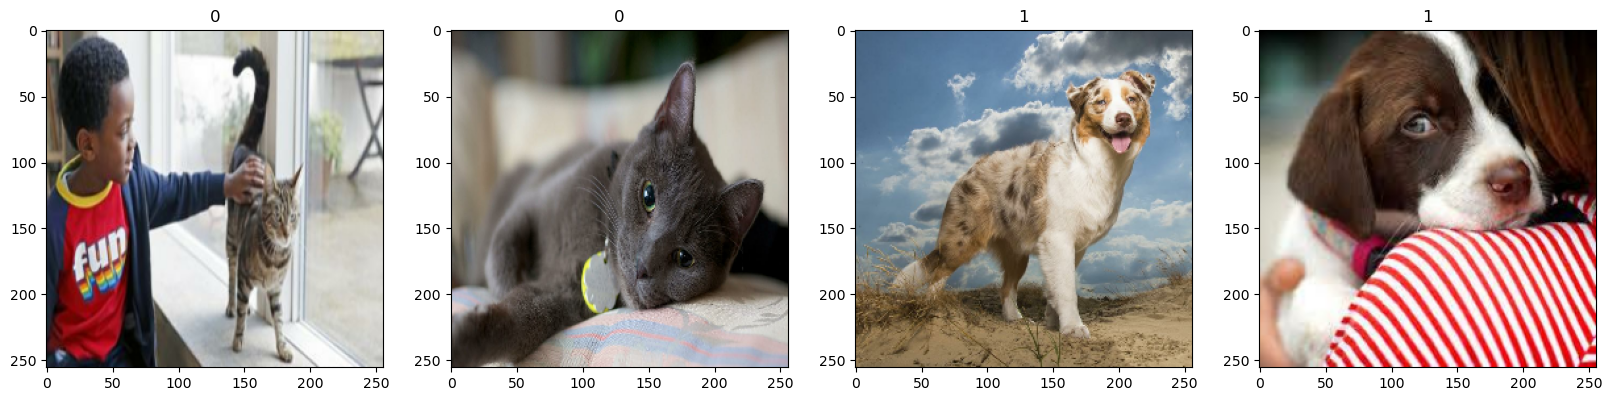

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
# batch[0] = images batch[1] = labels
batch[0].max()

255.0

In [31]:
# convert 0,255 to 0,1 for optimization
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          ...,
          [0.8901961 , 0.6627451 , 0.03921569],
          [0.89630103, 0.66168094, 0.04173608],
          [0.90266544, 0.66737133, 0.04776348]],
 
         [[0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          ...,
          [0.8901961 , 0.6627451 , 0.03921569],
          [0.89058816, 0.65596807, 0.03602319],
          [0.8964154 , 0.6611213 , 0.04151348]],
 
         [[0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          [0.8862745 , 0.65882355, 0.03529412],
          ...,
          [0.8901961 , 0.6627451 , 0.03921569],
          [0.8901961 , 0.655576  , 0.03563113],
          [0.89479166, 0.65949756, 0.0398897 ]],
 
         ...,
 
         [[0.90076596, 0.6733149 , 0.04586397],
          [0.90229

In [33]:
print("Number of data batches: ",len(data))

Number of data batches:  18


In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
print("Train size: ",train_size)
print("Val size: ",val_size)
print("Test size: ",test_size)

Train size:  12
Val size:  3
Test size:  1


In [36]:
#split batches equally
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [37]:
print("Train size: ",train_size)
print("Val size: ",val_size)
print("Test size: ",test_size)

Train size:  12
Val size:  4
Test size:  2


In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
model = Sequential()

In [42]:
#conv1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#conv2
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#conv3
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#flatten
model.add(Flatten())

#fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - accuracy: 0.4844 - loss: 0.8095 - val_accuracy: 0.4297 - val_loss: 0.6989
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.5286 - loss: 0.6872 - val_accuracy: 0.5156 - val_loss: 0.6759
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - accuracy: 0.5781 - loss: 0.6627 - val_accuracy: 0.6484 - val_loss: 0.6357
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 316ms/step - accuracy: 0.6328 - loss: 0.6320 - val_accuracy: 0.6562 - val_loss: 0.5859
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.6745 - loss: 0.6080 - val_accuracy: 0.6641 - val_loss: 0.5848
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.7370 - loss: 0.5620 - val_accuracy: 0.6953 - val_loss: 0.5958
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.7474 - loss: 0.5398 - val_accuracy: 0.7500 - val_loss: 0.4933
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.7682 - loss: 0.5121 - val_accuracy: 0.

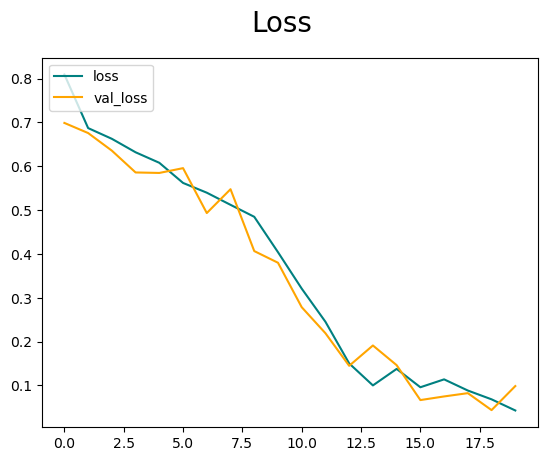

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

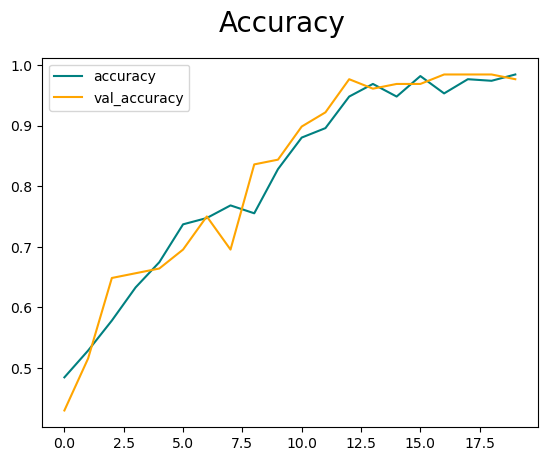

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [53]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\Default User.LAPTOP-3RURU2IV\AppData\Local\Temp\ipykernel_31964\3481232238.py:1: SyntaxWarning: invalid escape sequence '\k'
  img = cv2.imread('test\kitty.jpeg') #test1: cat


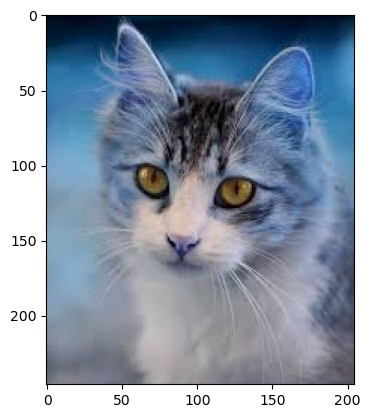

In [64]:
img = cv2.imread('test\kitty.jpeg') #test1: cat
plt.imshow(img)
plt.show()

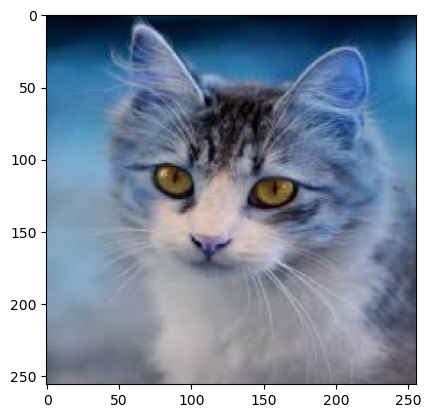

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [67]:
yhat

array([[0.10785143]], dtype=float32)

In [68]:
if yhat > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Default User.LAPTOP-3RURU2IV\AppData\Local\Temp\ipykernel_31964\1345362213.py:1: SyntaxWarning: invalid escape sequence '\h'
  img2 = cv2.imread('test\half dog.jpeg') #test2: dog (half face only)


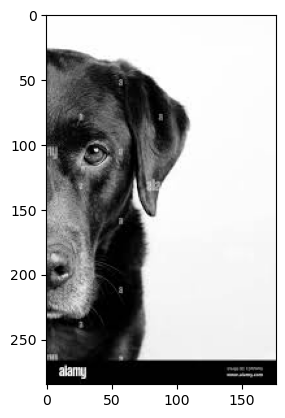

In [69]:
img2 = cv2.imread('test\half dog.jpeg') #test2: dog (half face only)
plt.imshow(img2)
plt.show()

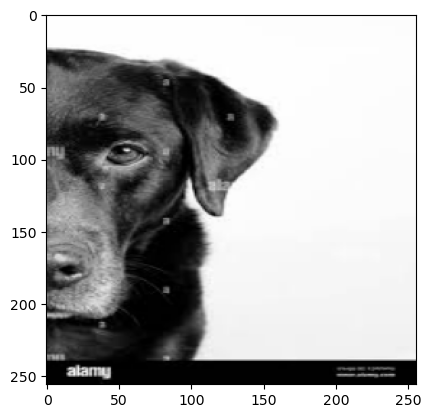

In [70]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [71]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [72]:
yhat2

array([[0.9936741]], dtype=float32)

In [73]:
if yhat2 > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is dog


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Default User.LAPTOP-3RURU2IV\AppData\Local\Temp\ipykernel_31964\3314315450.py:1: SyntaxWarning: invalid escape sequence '\m'
  img3 = cv2.imread('test\monkey.jpeg') #test3: neither classes!


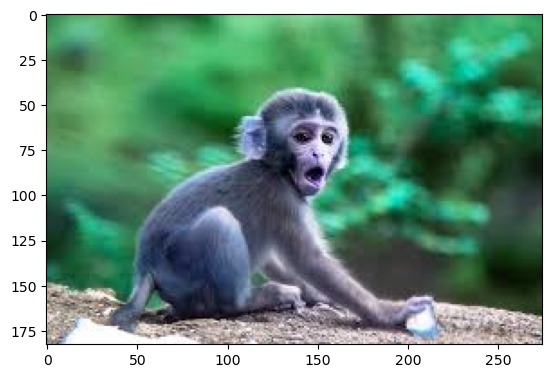

In [74]:
img3 = cv2.imread('test\monkey.jpeg') #test3: neither classes!
plt.imshow(img3)
plt.show()

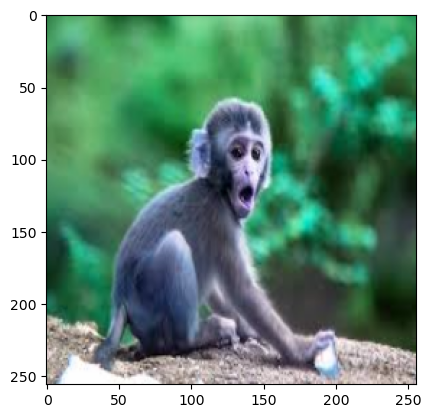

In [75]:
resize3 = tf.image.resize(img3, (256,256))
plt.imshow(resize3.numpy().astype(int))
plt.show()

In [76]:
yhat3 = model.predict(np.expand_dims(resize3/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [77]:
yhat3

array([[0.21067683]], dtype=float32)

In [78]:
if yhat3 > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat
